In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('/content/BufferReadDynamicEnergy.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X, y)

# Now you can use this model to predict buffer read dynamic energy for new data
# For example, if you want to predict buffer read dynamic energy for MemCellType=1, numRowSubArray/numColSubArray=64, and Layer=10
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [512]
})
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy*100}%")
# Predicting buffer read dynamic energy for new data
predicted_buffer_read_dynamic_energy = model.predict(new_data)
print("Predicted Buffer Read Dynamic Energy:", predicted_buffer_read_dynamic_energy)


Training Accuracy: 98.62781421636348%
Predicted Buffer Read Dynamic Energy: [[2.1172636e+03 4.3043393e+03 1.6661995e+04 4.7607085e+03 2.0119107e+04
  5.2170693e+03 2.3593296e+04 5.6734386e+03 3.2540272e+04 6.1298071e+03
  3.6014510e+04 6.5861693e+03 3.9475604e+04 6.6347293e+03 1.3035688e+03
  5.1191676e+03 1.4176588e+03 7.0629535e+03 1.5317488e+03 7.8174027e+03
  1.6458389e+03 8.5678781e+03 1.7599296e+03 9.3223351e+03 1.8740196e+03
  1.0089930e+04 2.0730287e+03 3.5290732e+02 1.2780250e+03 3.8143032e+02
  1.4088895e+03 4.0995332e+02 1.5556986e+03 4.3847631e+02 1.6865143e+03
  4.6699846e+02 1.8345749e+03 4.9552146e+02 2.1412643e+03 3.7475183e+00]]


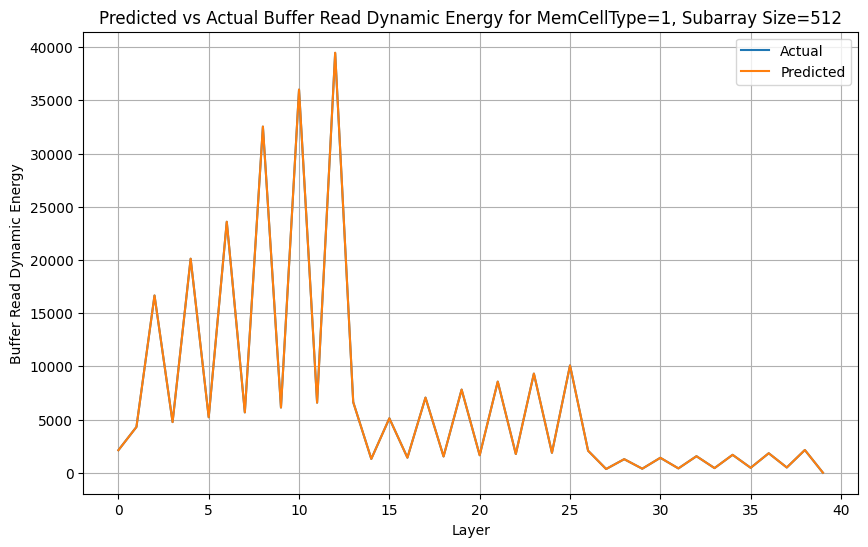

In [ ]:
import matplotlib.pyplot as plt

# Choose MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 512

# Filter the training data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data = data[(data['MemCellType'] == mem_cell_type) & (data['numRowSubArray/numColSubArray'] == subarray_size)]

# Extract the actual BufferReadDynamicEnergy values
actual_values = filtered_data.iloc[:, 2:]

# Plot the predicted BufferReadDynamicEnergy and the actual BufferReadDynamicEnergy values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.values[0], label='Actual')
plt.plot(predicted_buffer_read_dynamic_energy[0], label='Predicted')
plt.xlabel('Layer')
plt.ylabel('Buffer Read Dynamic Energy')
plt.title(f'Predicted vs Actual Buffer Read Dynamic Energy for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
plt.legend()
plt.grid(True)
plt.show()


Training Accuracy: 0.9656252725507561


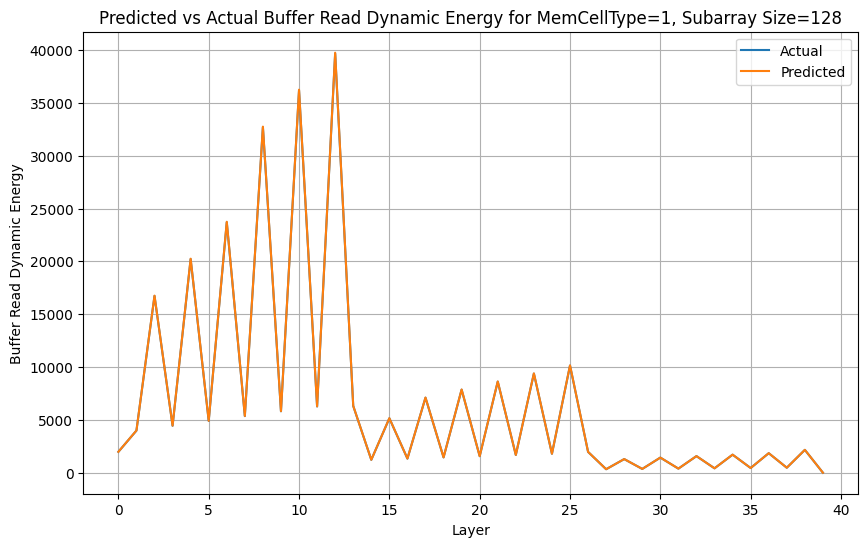

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/BufferReadDynamicEnergy.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

# Predicting BufferReadDynamicEnergy for the testing data
predicted_buffer_read_dynamic_energy_test = model.predict(X_test)

# Plot a graph comparing the predicted and actual BufferReadDynamicEnergy values for a specific MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 128
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Filter the testing data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data_test = X_test[(X_test['MemCellType'] == mem_cell_type) & (X_test['numRowSubArray/numColSubArray'] == subarray_size)]

if not filtered_data_test.empty:
    index_test = filtered_data_test.index[0]

    # Extract the actual BufferReadDynamicEnergy values for the chosen MemCellType and numRowSubArray/numColSubArray
    actual_values_test = y_test.iloc[index_test]

    # Plot the predicted and actual BufferReadDynamicEnergy values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_test.values, label='Actual')
    plt.plot(predicted_buffer_read_dynamic_energy_test[index_test], label='Predicted')
    plt.xlabel('Layer')
    plt.ylabel('Buffer Read Dynamic Energy')
    plt.title(f'Predicted vs Actual Buffer Read Dynamic Energy for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified MemCellType and Subarray Size.")
